# Practicals for lecture 1.1

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec/blob/main/practicals/Practicals_1.1.ipynb)

## More on `numpy`

In [2]:
import numpy as np
from matplotlib import pyplot as plt

#### 1.1.0 Stats over numpy arrays

In [3]:
# Use np.random.normal to initialize a vector of 1000 numbers of mean 10 and standard deviation 3. 
# Then calculate the actual mean and standard deviation of the array you got using numpy.
arr = np.random.normal(10, 3, 1000)

np.mean(arr), np.std(arr)

(10.020685532930035, 3.1268081398071783)

In [4]:
import requests
import json

def download_meteo_data(start_date="2022-01-01", end_date="2022-12-31",
                        latitude="45.88204", longitude="11.03647",
                        data="temperature_2m"):
    """Download meteo historical data from open-meteo.com.
    
    Parameters
    ----------
        start_date : str
            Beginning of time series.
            
        end_date : str
            End of time series.
            
        latitude : float
            Latitude of the time series.
            
        longitude : float
            Longitude of the time series.
            
        data : str
            Data to download. One of "temperature_2m", "relativehumidity_2m",
            "precipitation", "snowfall", "windspeed_10m".
            
    Returns
    -------
        np.array
            1D array of timestamps
        np.array
            1D array of data, sampled every hour (24 points per day)

    """
    BASE_URL = "https://archive-api.open-meteo.com/v1/"
    query = f"archive?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&hourly={data}"

    r = requests.get(BASE_URL + query)
    json_dict = json.loads(r.text)
    
    if "hourly" not in json_dict.keys():
        print(json_dict)
        return None, None
    else:
        return (np.array(json_dict["hourly"][k]) for k in ["time", data])


tststamps_array, temp_array = download_meteo_data()

In [6]:
temp_array.shape

(8760,)

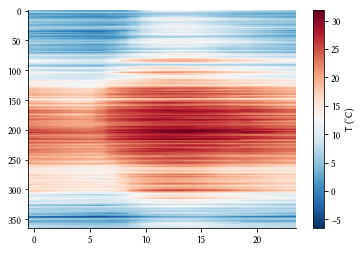

In [35]:
# Run the cell above to download an array of temperatures in Rovereto during 2022. 
# Temperatures data are sampled every hour. 

# Reshape the array to be a matrix of shape (n_days, n_hours). 
n_days = 365
n_hours = 24

temp_mat = np.reshape(temp_array, (n_days, n_hours))

# Plot it with plt.matshow() to check if it makes sense. Change the colormap to be divergent around 0.
plt.imshow(temp_mat, aspect="auto", cmap="RdBu_r")
plt.set_xlabel="Hour"
plt.set_ylabel="Day"
plt.colorbar(label="T (°C)")

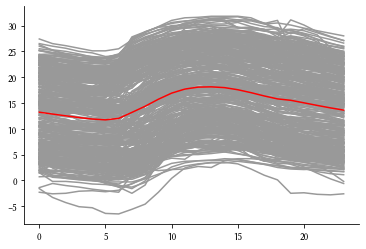

In [37]:
# Use plt.plot to show temperatures for all days (each day a line). You can do it in a for loop,
# or in one call of the function given the right dimension order for the data matrix!
# for day_idx in range(n_days):
#     plt.plot(temp_mat[day_idx, :])
plt.plot(temp_mat.T, c="0.6")



# Compute the average temperature line over days, and plot it on top of the individual day lines.
# Look into the plt.plot documentation to make the lines of the individual days gray and the average red.

avg_daily_temps = np.mean(temp_mat, axis=0)
plt.plot(avg_daily_temps, c="r")


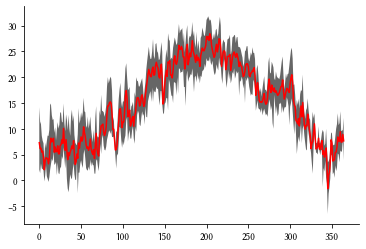

In [29]:
# From the temperatures data, create one-dimensional arrays with the minimum, mean and maximum temperatures
# of each day.
mean_t = np.mean(temp_mat, axis=1)
min_t = np.min(temp_mat, axis=1)
max_t = np.max(temp_mat, axis=1)

# Look into the documentation for the plt.fill_between() function, and use it to make a plot 
# where you represent the temperature range for every day of the year.
x_array = np.arange(n_days)
plt.fill_between(x_array, min_t, max_t)
plt.plot(x_array, mean_t, c="r")

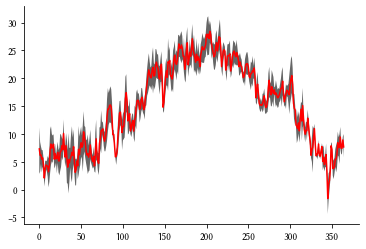

In [31]:
# Repeat the same, but now representing the 25th-75th percentile range for every day.

perc25_t = np.percentile(temp_mat, 25, axis=1)
perc75_t = np.percentile(temp_mat, 75, axis=1)

# Look into the documentation for the plt.fill_between() function, and use it to make a plot 
# where you represent the temperature range for every day of the year.
x_array = np.arange(n_days)
plt.fill_between(x_array, perc25_t, perc75_t)
plt.plot(x_array, mean_t, c="r")

In [32]:
# Are Murphy's laws true? Does it rain more on weekends?

# Write the docs of download_meteo_data(), and use it to download precipitation data from 2022.
# Tip: change the end_date argument to be end_date="2022-12-30" to have a multiple of 7 days!
# [edit: there was an error in this date in the original practicals sheet].
# Tip2: check out a calendar to see which weekday the array will start from.

# Reshape the matrix as we did before, and compute cumulative (or average) precipitations per day.

tststamps_array, precipitation_array = download_meteo_data(data="precipitation", 
                                                           start_date="2022-01-01", 
                                                           end_date="2022-12-30")

print((len(precipitation_array) / 24) / 7)
n_hours = 24

precipitation_mat = precipitation_array.reshape((precipitation_array.shape[0] // n_hours, n_hours))

daily_precipitations = np.sum(precipitation_mat, axis=1)
daily_precipitations.shape

52.0


(364,)

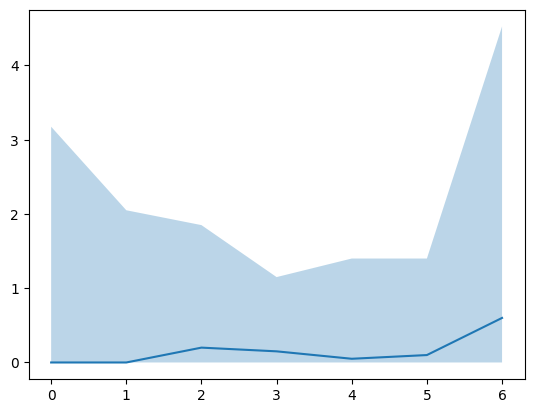

In [49]:
# Then, reshape the daily averages array to be of shape (n_weeks, n_weekdays)
n_weekdays = 7
n_weeks = daily_precipitations.shape[0] // n_weekdays

week_precipitation_mat = daily_precipitations.reshape((n_weeks, n_weekdays))

# Finally, take the average over the n_weeks dimension and plot median precipitation for each weekday!
# Bonus points: represent the dispersion of the data (std or percentiles) using plt.fill_between().

# We compute directly the median and the 1st and 3rd quartiles using percentile:
percentiles = np.percentile(week_precipitation_mat, (25, 50, 75), axis=0)

x_array = np.arange(n_weekdays)  # array with the x coordinates of the plot

plt.fill_between(x_array, percentiles[0, :], percentiles[2, :], 
                 alpha=0.3, lw=0)  # set opacity and remove shade borders

plt.plot(x_array, percentiles[1, :])
